# Housing Price Prediction

## Problem Statement 

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world's economy. It is a very lare market and thre are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits,improving their marketing stategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation system are some of the machine learning techniques used for achieving the business goals for housing companies.Our problem is related to one such housing company.
   
   A US-based housing company named Suprise Housing had decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.The data is provided in the CSV file below.
   
   The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
	
   . Which variables are important to predict the price of varianle?
	
   . How do these variables describe the price of the house?
## Business Goal:
   You are required to model the price of house with the available independent variables.This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further,the model will be a good way for the management to understand the pricing dynamics of a new market.

## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## Data files

In [2]:
#reading the csv files
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
#checking dimension of train data
train.shape

(1168, 81)

In [4]:
#settign max columns to display
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',81)

In [5]:
#checking the dat distribution in train data file
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [6]:
#chcking dimension of test data
test.shape

(292, 80)

In [7]:
#checking the data distribution in test data file
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [8]:
#checking the infomation of train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [9]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.5,1079.5,1460.0
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1161.0,102.310078,182.595606,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0


In [10]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
print(train.columns[train.isnull().any()])
print(len(train.columns[train.isnull().any()]))

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')
18


we have null values in 18 columns 

In [12]:
#missing value counts in each of these columns
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)

In [13]:
miss

MasVnrType      0.005993
MasVnrArea      0.005993
BsmtQual        0.025685
BsmtCond        0.025685
BsmtFinType1    0.025685
BsmtFinType2    0.026541
BsmtExposure    0.026541
GarageCond      0.054795
GarageQual      0.054795
GarageFinish    0.054795
GarageType      0.054795
GarageYrBlt     0.054795
LotFrontage     0.183219
FireplaceQu     0.471747
Fence           0.797089
Alley           0.934075
MiscFeature     0.962329
PoolQC          0.994007
dtype: float64

We can infer that the variable PoolQC has 99.5% missing values followed by MiscFeature, Alley, and Fence. Let's look at a pretty picture explaining these missing values using a bar plot.

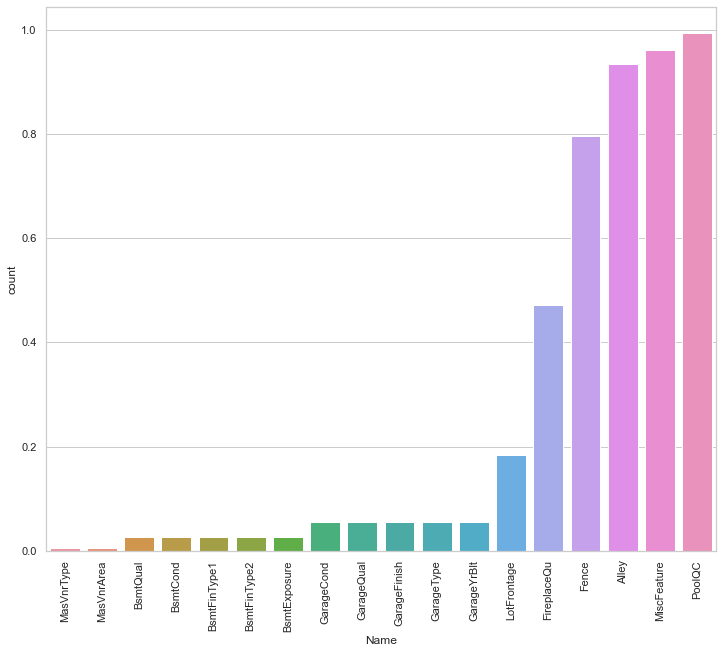

In [14]:
#visualising missing values
miss = miss.to_frame()

miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
plt.figure(figsize=(12,10))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()

here we can clearly see that PoolQC,MiscFeature, Alley, and Fence has null values more than 80%

In [15]:
columns=["PoolQC","MiscFeature", "Alley", "Fence"]
train[columns].dtypes

PoolQC         object
MiscFeature    object
Alley          object
Fence          object
dtype: object

In [16]:
print("PoolQC")
print(train['PoolQC'].unique())
print(train['PoolQC'].value_counts())
print('\n')

print("MiscFeature")
print(train['MiscFeature'].unique())
print(train['MiscFeature'].value_counts())
print('\n')

print('Alley')
print(train["Alley"].unique())
print(train["Alley"].value_counts())
print('\n')

print("Fence")
print(train['Fence'].unique())
print(train['Fence'].value_counts())

PoolQC
[nan 'Ex' 'Gd' 'Fa']
Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64


MiscFeature
[nan 'Shed' 'Gar2' 'TenC' 'Othr']
Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64


Alley
[nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64


Fence
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64


here we have very less values in these columns so we can drop these 

In [17]:
train.drop(["PoolQC","MiscFeature", "Alley", "Fence"],inplace=True,axis=1)
test.drop(["PoolQC","MiscFeature", "Alley", "Fence"],inplace=True,axis=1)

ID is not useful to predict the price so we can drop the ID column

In [18]:
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [19]:
train.shape

(1168, 76)

In [20]:
train['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.953877705368286


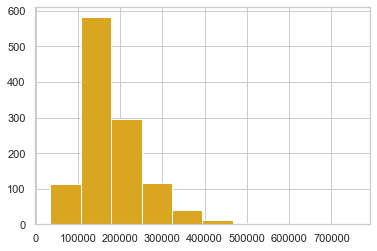

In [21]:
# Determining the Skewness of data 
print ("Skew is:", train.SalePrice.skew())

plt.hist(train.SalePrice,color='goldenrod')
plt.show()


Sales price is right skewed. So, we perform log transformation so that it become normally distributed(or close to normal).This transformation helps in better modeling the realtionship between target and independent variable

Skew is: 0.07359740998337982


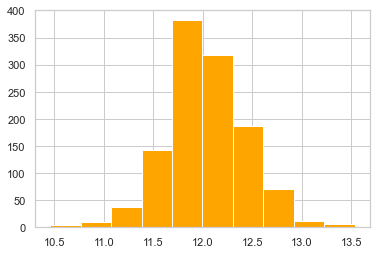

In [22]:
#log transforomation
train['Skewed_SP'] = np.log(train['SalePrice'])

print ("Skew is:", train['Skewed_SP'].skew())

plt.hist(train['Skewed_SP'], color='orange')
plt.show()

After log transformation of the data it looks much more center aligned

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

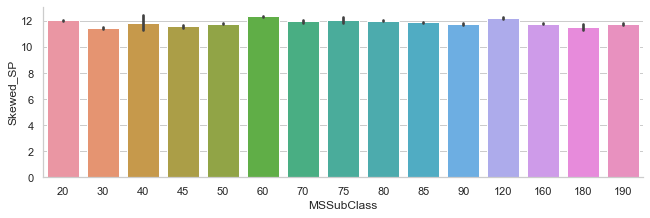

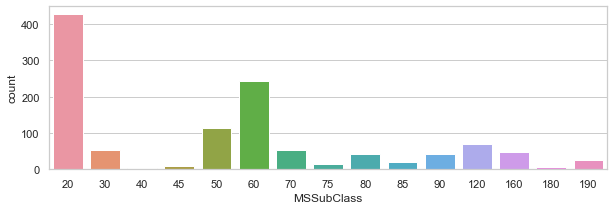

In [23]:
sns.factorplot('MSSubClass', 'Skewed_SP', data=train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSSubClass', data=train)
train['MSSubClass'].value_counts()

In [24]:
train.OverallQual.unique()

array([ 6,  8,  7,  5,  9,  1,  2,  4,  3, 10], dtype=int64)

In [25]:
#Creating a pivot table 
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)

In [26]:
quality_pivot

,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,86250.0
4,108959.0
5,133700.0
6,160000.0
7,200120.5
8,268750.0
9,343821.5


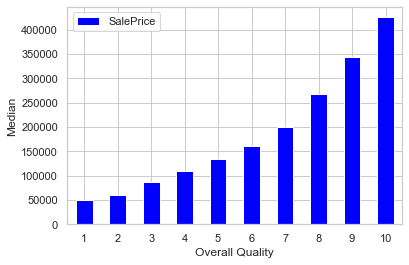

In [27]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='Skewed_SP'>

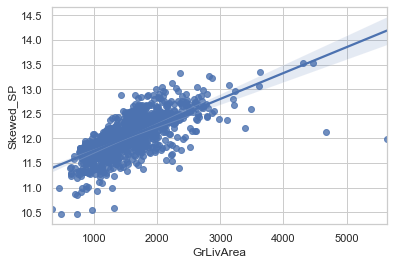

In [28]:
sns.regplot(x='GrLivArea',y='Skewed_SP',data=train)

SalePrice increases as the GrLivArea increases. We will also get rid of the outliers which severely affect the prediction of the survival rate.

<AxesSubplot:xlabel='GarageArea', ylabel='Skewed_SP'>

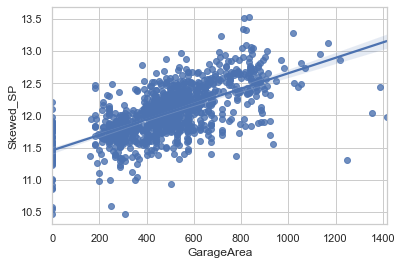

In [29]:
sns.regplot(x='GarageArea',y='Skewed_SP',data=train)

GarageArea and SalePrice are directly proportional.

We will again get rid of the outliers.

<AxesSubplot:>

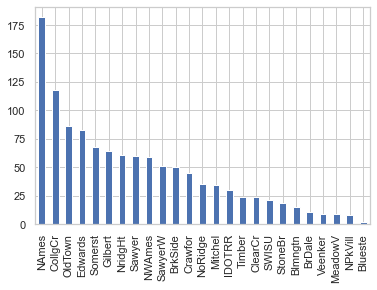

In [30]:
train['Neighborhood'].value_counts().plot(kind='bar')

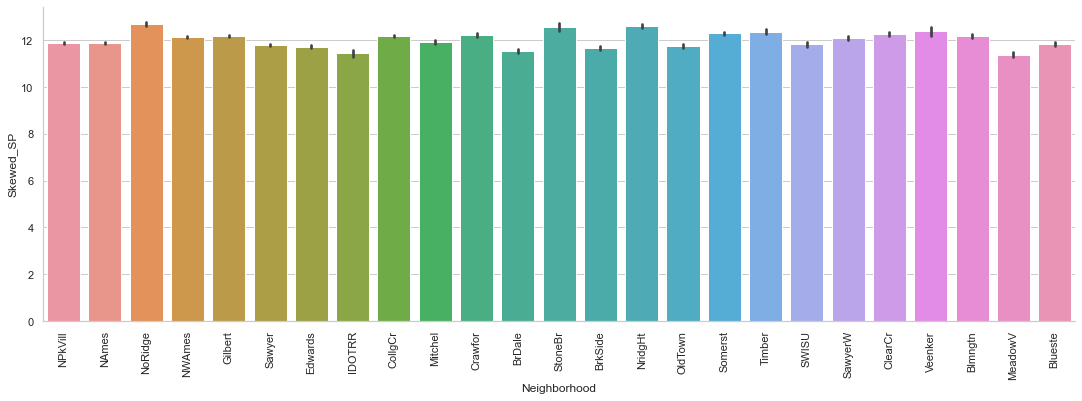

In [31]:
g = sns.factorplot(x='Neighborhood', y='Skewed_SP', data=train, kind='bar', aspect=3)
g.set_xticklabels(rotation=90)

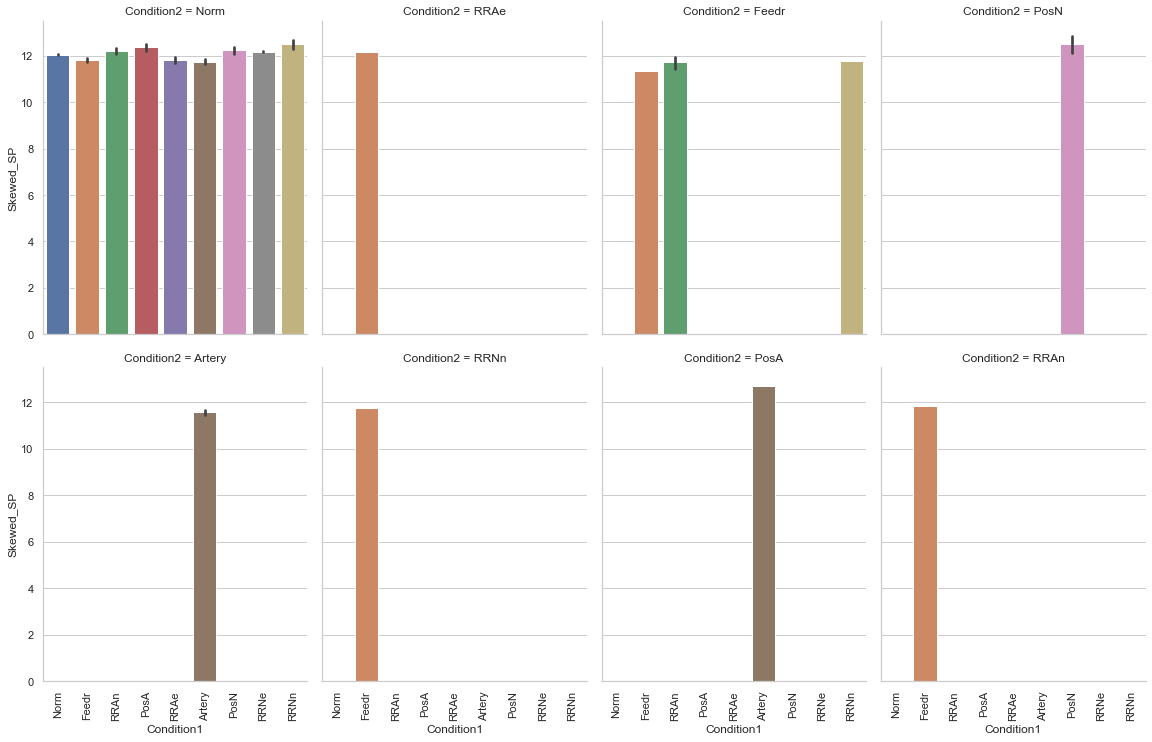

In [32]:
g = sns.factorplot(x='Condition1', y='Skewed_SP', col='Condition2', data=train, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

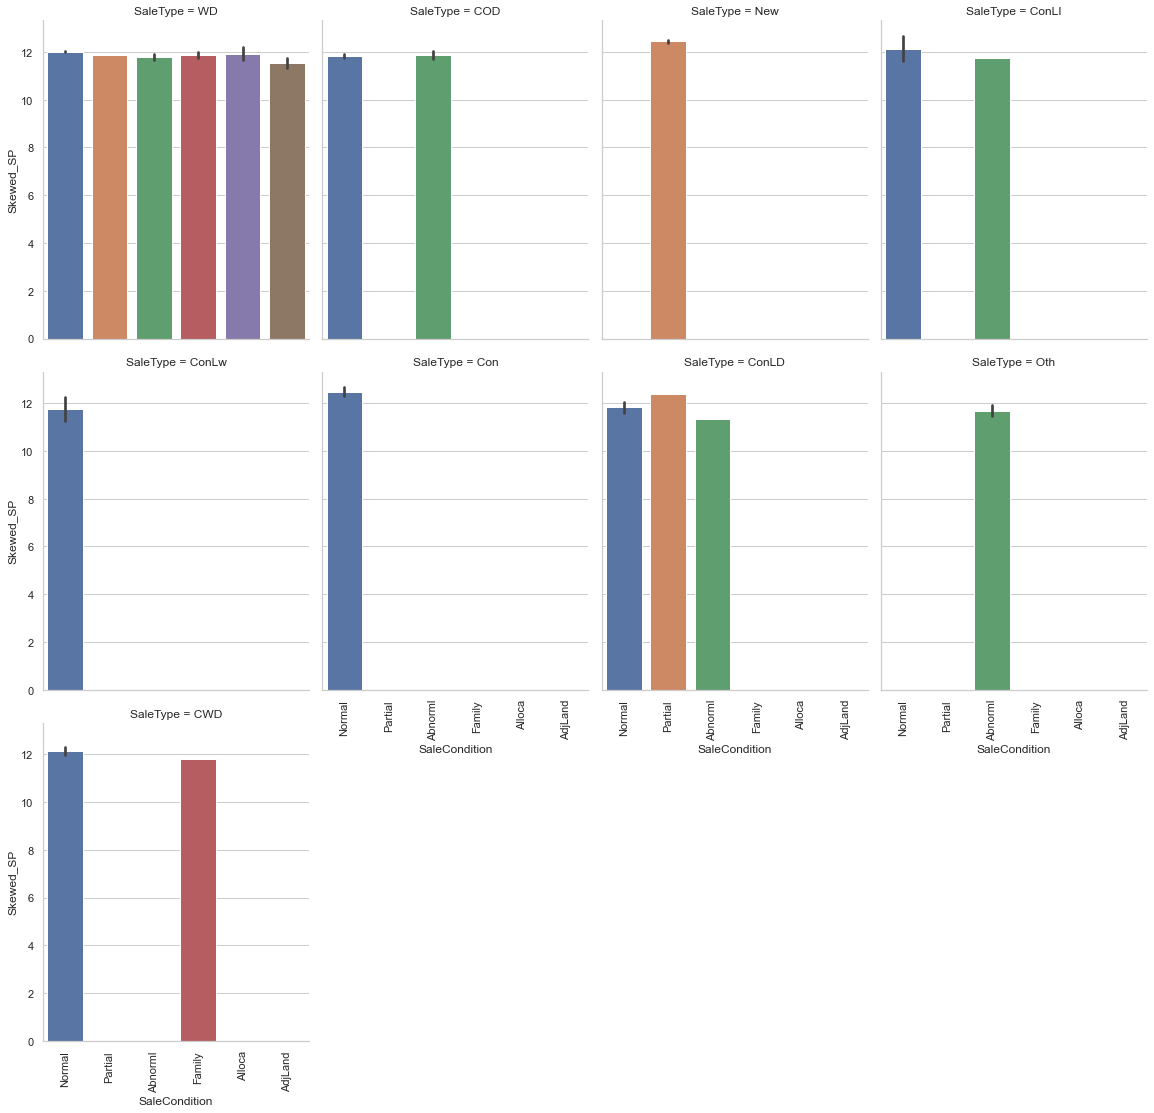

In [33]:
g = sns.factorplot(x='SaleCondition', y='Skewed_SP', col='SaleType', data=train, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

In [34]:
#identification of data 
train['feature']='train'
test['feature']='test'

In [35]:
#concat train and test data
df=pd.concat([train,test])

In [36]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Skewed_SP,feature
0,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000.0,11.759786,train
1,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000.0,12.498742,train
2,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790.0,12.505399,train
3,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000.0,12.154779,train
4,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000.0,12.278393,train


In [37]:
df["SalePrice"].fillna(0, inplace=True)
df["Skewed_SP"].fillna(0, inplace=True)

In [38]:
#separate variables into new data frames
numeric_data = df.select_dtypes(include=[np.number])
obj_data = df.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],obj_data.shape[1]))

There are 38 numeric and 40 categorical columns in train data


In [39]:
numeric_data.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
Skewed_SP          0
dtype: int64

In numerical dtype columns, (LotFrontage,MasVnrArea,GarageYrBlt) these 3 cloumns has null values

In [40]:
numeric_data["LotFrontage"].fillna(numeric_data["LotFrontage"].mean(),inplace=True)
numeric_data["MasVnrArea"].fillna(numeric_data["MasVnrArea"].mean(),inplace=True)
numeric_data["GarageYrBlt"].fillna(numeric_data["GarageYrBlt"].mean(),inplace=True)

In [41]:
df["LotFrontage"].fillna(df["LotFrontage"].mean(),inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].mean(),inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].mean(),inplace=True)

In [42]:
corr=df.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Skewed_SP
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.041987,-0.009101
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.255812,0.090917
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.135137,0.008399
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.500410,0.061606
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.014932,0.035616
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.304438,0.015579
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.311648,0.027457
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.249367,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.280897,0.012631
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.233147,0.028066
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087126,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.02999

<AxesSubplot:>

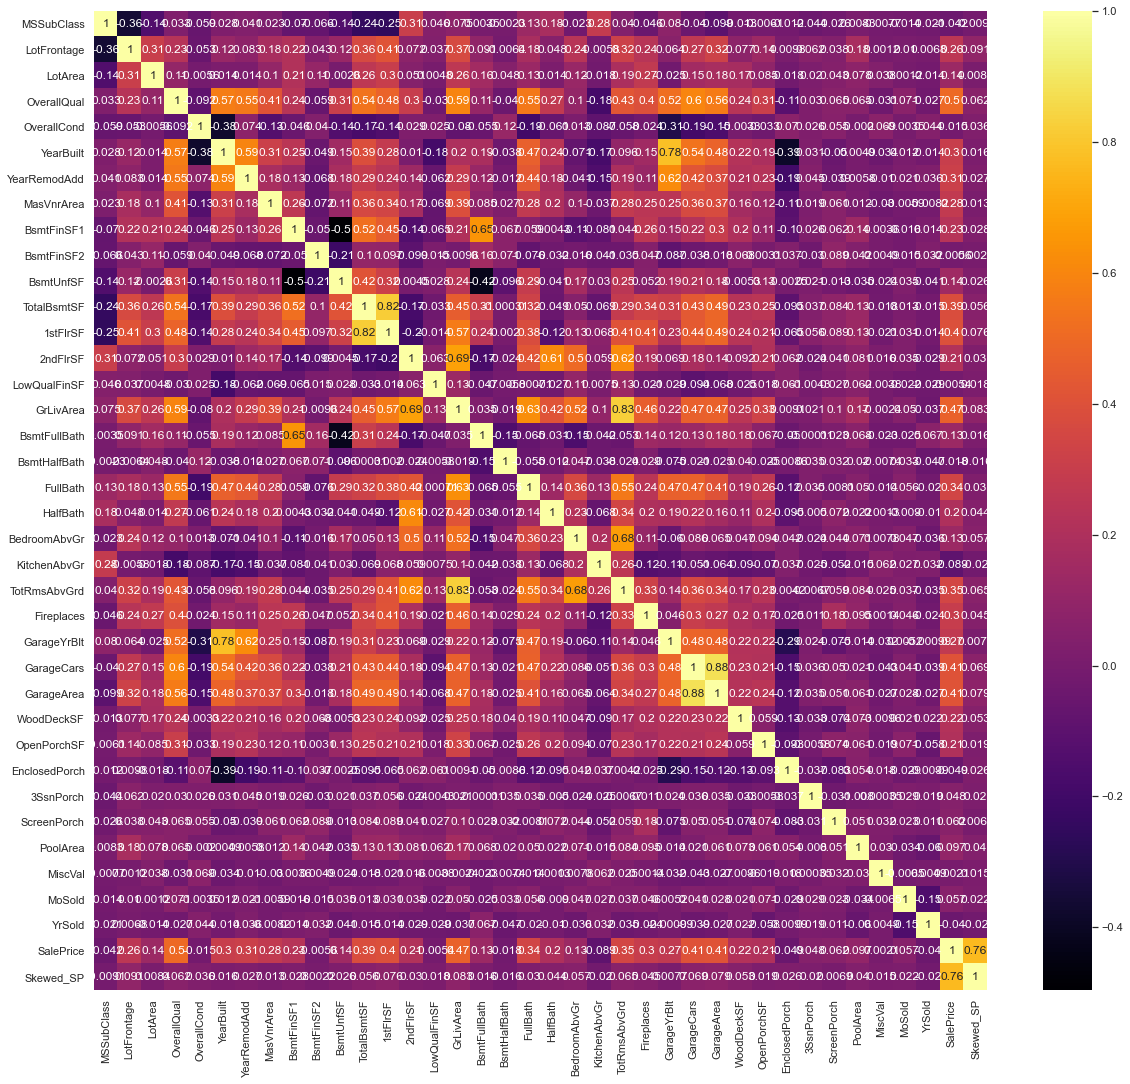

In [43]:
plt.figure(figsize=(20,18))
sns.heatmap(corr,cmap='inferno',annot=True)

we have so many columns so we can find which is good correlation with our target value.

In [44]:
corr1=corr['SalePrice'].sort_values(ascending=False)
corr1

SalePrice        1.000000
Skewed_SP        0.762918
OverallQual      0.500410
GrLivArea        0.469774
GarageArea       0.413528
GarageCars       0.409281
1stFlrSF         0.397907
TotalBsmtSF      0.386365
TotRmsAbvGrd     0.346338
FullBath         0.340300
YearRemodAdd     0.311648
YearBuilt        0.304438
Fireplaces       0.298993
MasVnrArea       0.280897
GarageYrBlt      0.270200
LotFrontage      0.255812
BsmtFinSF1       0.233147
WoodDeckSF       0.220590
2ndFlrSF         0.213714
OpenPorchSF      0.210115
HalfBath         0.201822
BsmtUnfSF        0.144971
LotArea          0.135137
BsmtFullBath     0.134053
BedroomAbvGr     0.130543
PoolArea         0.096631
ScreenPorch      0.061583
MoSold           0.056921
3SsnPorch        0.048469
MiscVal          0.002118
LowQualFinSF    -0.005367
BsmtFinSF2      -0.005552
OverallCond     -0.014932
BsmtHalfBath    -0.018179
YrSold          -0.040262
MSSubClass      -0.041987
EnclosedPorch   -0.049325
KitchenAbvGr    -0.088731
Name: SalePr

In [45]:
cor=corr1[corr1<0]
cor

LowQualFinSF    -0.005367
BsmtFinSF2      -0.005552
OverallCond     -0.014932
BsmtHalfBath    -0.018179
YrSold          -0.040262
MSSubClass      -0.041987
EnclosedPorch   -0.049325
KitchenAbvGr    -0.088731
Name: SalePrice, dtype: float64

here we can see that 9 columns which has less correlated almost zero with our target variable that has no effect on the predicting values, here i am droping those columns in train and test dataframe

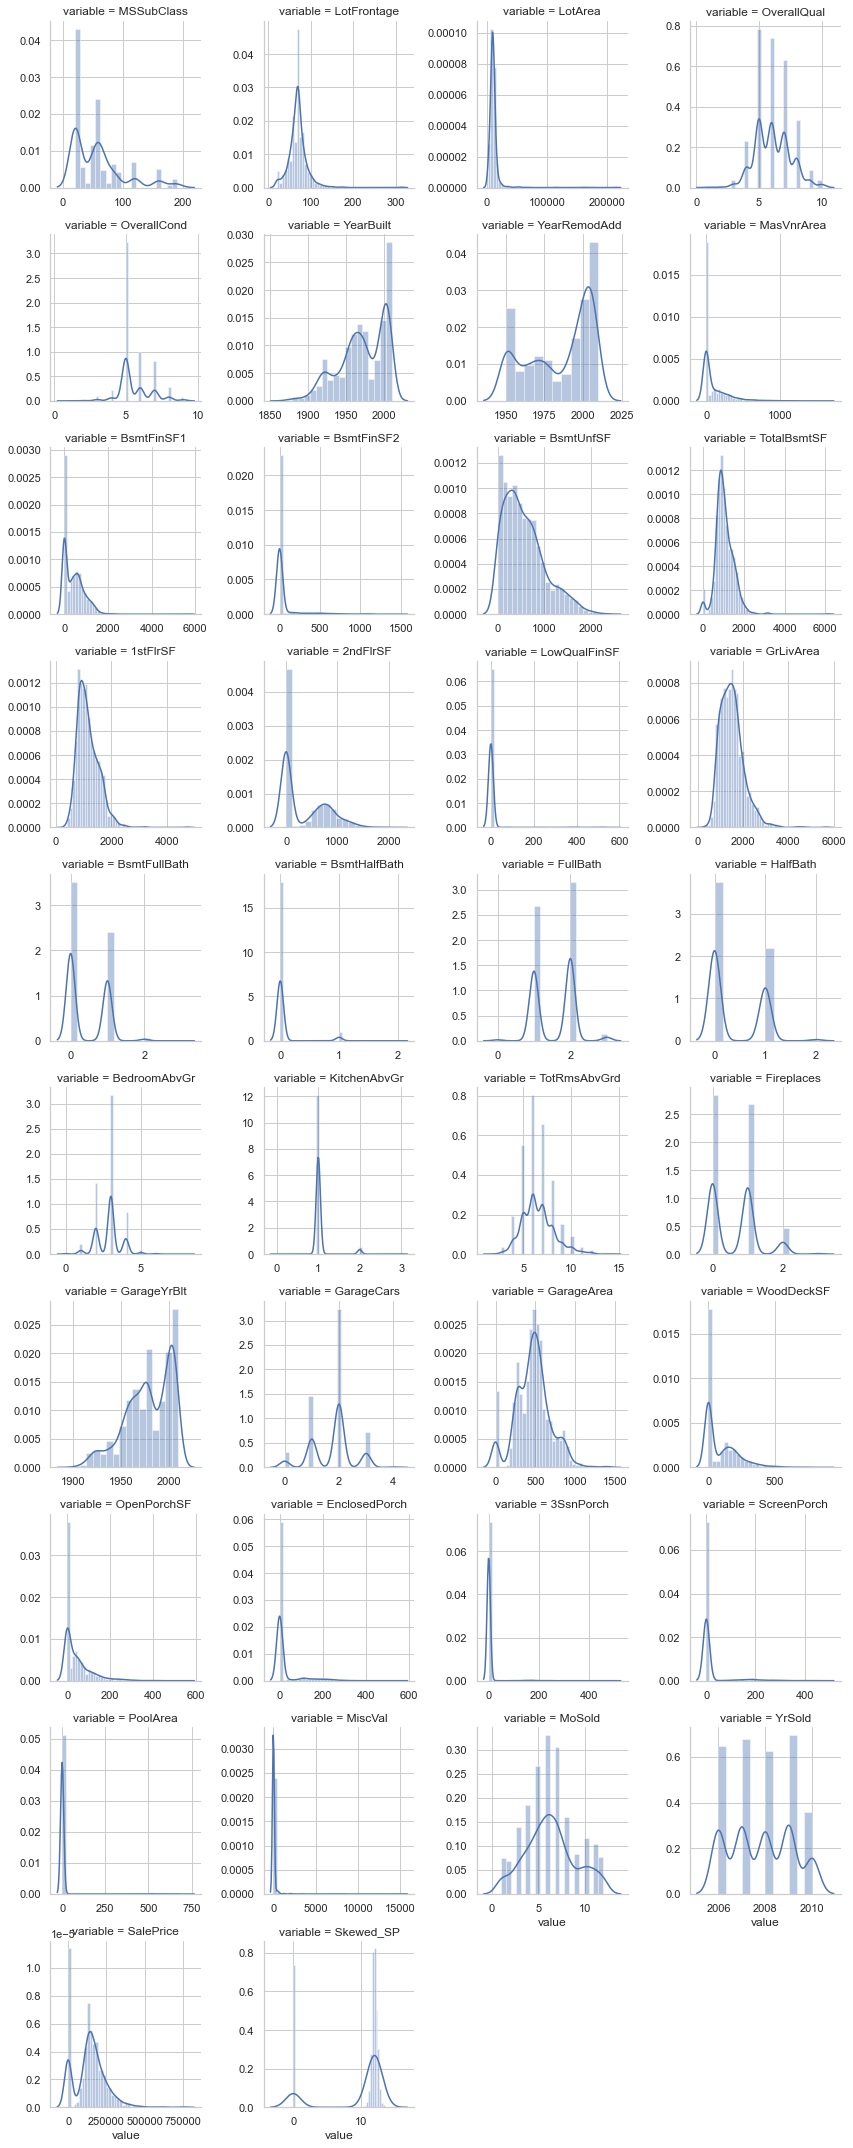

In [46]:
#create numeric plots
num = [f for f in train.columns if df.dtypes[f] != 'object']
nd = pd.melt(numeric_data, value_vars = num)
plot = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
plot = plot.map(sns.distplot, 'value')
plot

As you can see, most of the variables are right skewed. We'll have to transform them.

In [47]:
def log_transform(data_frame,feature_name):
    data_frame_copy=data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name]=np.log(data_frame_copy[feature_name])
    print(data_frame[feature_name].skew())
    data_frame[feature_name].plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(22,16))
    plt.show()

MSSubClass
1.4076567471495585


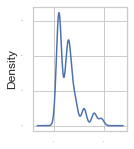

LotFrontage
2.3849501679427925


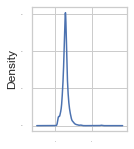

LotArea
12.207687851233496


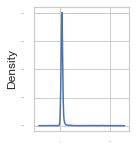

OverallQual
0.21694392776286914


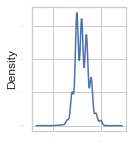

OverallCond
0.6930674724842181


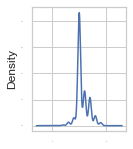

YearBuilt
-0.6134611724881832


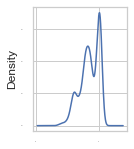

YearRemodAdd
-0.5035620027004708


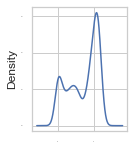

MasVnrArea
2.676411784729959


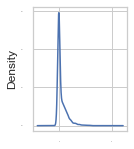

BsmtFinSF1
1.6855030719107889


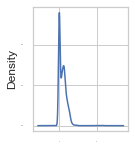

BsmtFinSF2
4.255261108933306


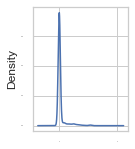

BsmtUnfSF
0.9202684528039037


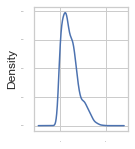

TotalBsmtSF
1.5242545490627655


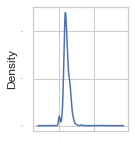

1stFlrSF
1.3767566220336365


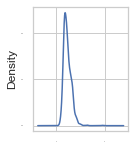

2ndFlrSF
0.8130298163023266


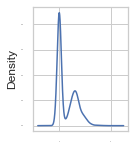

LowQualFinSF
9.011341288465388


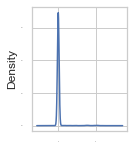

GrLivArea
1.3665603560164554


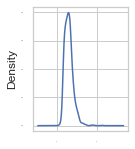

BsmtFullBath
0.596066609663168


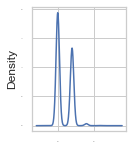

BsmtHalfBath
4.103402697955168


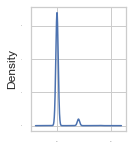

FullBath
0.036561558402727144


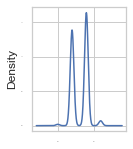

HalfBath
0.6758974482337222


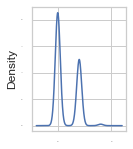

BedroomAbvGr
0.21179009627507137


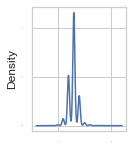

KitchenAbvGr
4.488396777072859


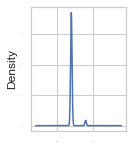

TotRmsAbvGrd
0.6763408364355531


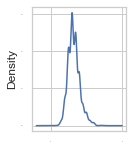

Fireplaces
0.6495651830548841


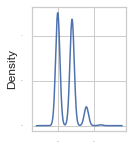

GarageYrBlt
-0.6681748227563908


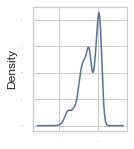

GarageCars
-0.3425489297486656


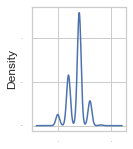

GarageArea
0.1799809067462391


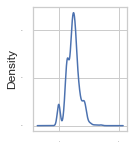

WoodDeckSF
1.5413757571931308


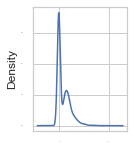

OpenPorchSF
2.3643417403694404


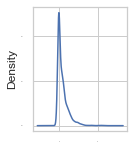

EnclosedPorch
3.08987190371177


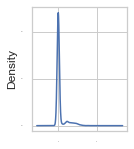

3SsnPorch
10.304342032693112


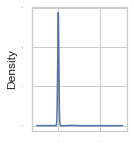

ScreenPorch
4.122213743143113


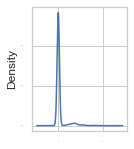

PoolArea
14.828373640750586


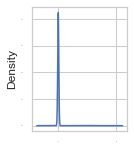

MiscVal
24.476794188821916


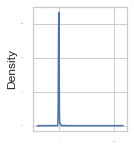

MoSold
0.21205298505146017


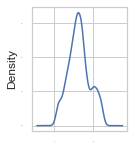

YrSold
0.09626851386568029


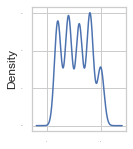

SalePrice
0.7141512456588753


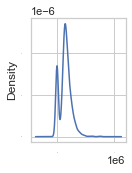

Skewed_SP
-1.4811874067685333


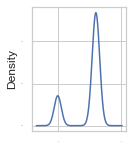

In [48]:
for f in numeric_data.columns:
    print(f)
    log_transform(df,f)

after using power transformation, the skewness remains same so we have to use any other transformation to remove the skewness,
in next step i use zscore to remove outliers 

In [49]:
col=["BsmtFinSF2","BsmtHalfBath","MiscVal","LowQualFinSF","YrSold","MSSubClass",
         "OverallCond","EnclosedPorch","KitchenAbvGr"]
df.drop(col,axis=1,inplace=True)

In [50]:
numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Skewed_SP'],
      dtype='object')

In [51]:
from scipy.stats import zscore

z=np.abs(zscore(df[{'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'SalePrice', 'Skewed_SP'}]))

new_df=df[(z<3).all(axis=1)]

In [52]:
new_df.shape

(1230, 69)

In [53]:
df.shape

(1460, 69)

 Now, let's create boxplots for visualizing categorical variables.

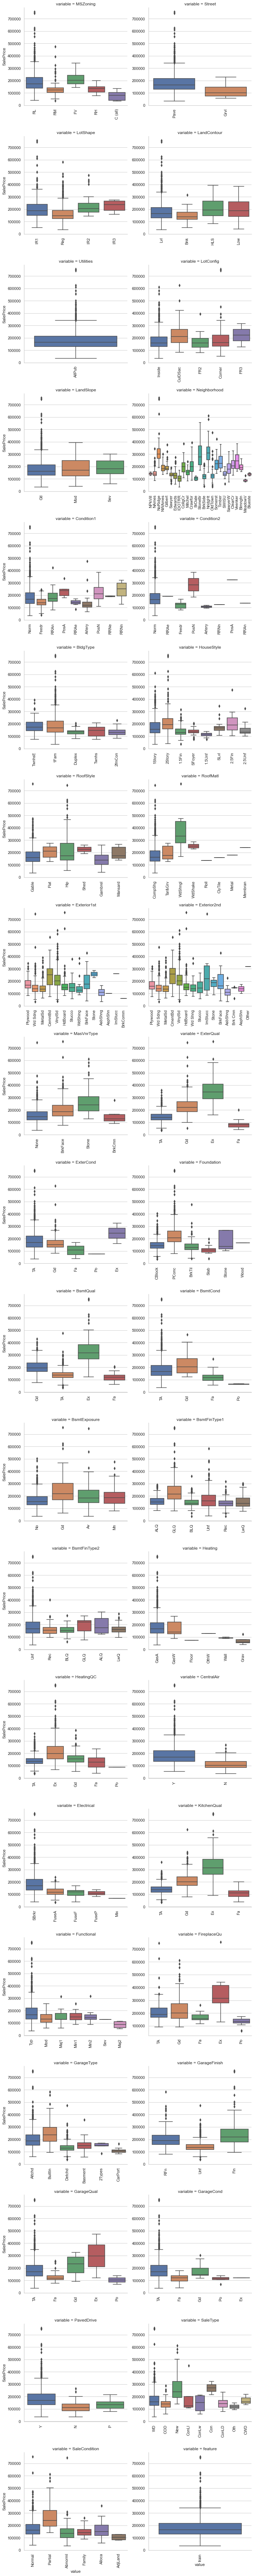

In [54]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

x = pd.melt(train, id_vars='SalePrice', value_vars=cat)
y = sns.FacetGrid (x, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
y = y.map(boxplot, 'value','SalePrice')
y

Here, we can see that most of the variables possess outlier values.

In [55]:
obj_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'feature'],
      dtype='object')

In [56]:
for i in obj_data.columns:
    new_df[i].fillna(new_df[i].mode(),inplace=True)
    j=new_df[i].unique()
    print(i,j)

MSZoning ['RL' 'RM' 'FV' 'RH' 'C (all)']
Street ['Pave' 'Grvl']
LotShape ['IR1' 'Reg' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities ['AllPub']
LotConfig ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['NPkVill' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards' 'NAmes'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
Condition1 ['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'PosN' 'Artery' 'RRNn' 'RRNe']
Condition2 ['Norm' 'Feedr' 'Artery' 'RRNn' 'RRAn']
BldgType ['TwnhsE' '1Fam' 'Twnhs' '2fmCon' 'Duplex']
HouseStyle ['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard']
RoofMatl ['CompShg' 'Roll' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran']
Exterior1st ['Plywood' 'MetalSd' 'CemntBd' 'VinylSd' 'Wd Sdng' 'HdBoard' 'Stucco'
 'WdShing' 'BrkFace' 'Stone' 'As

In [57]:
new_df=new_df.drop(['LotConfig','Utilities','Condition2','LandSlope','BldgType','MasVnrType',
      'BsmtCond','BsmtFinType1','FireplaceQu','Neighborhood','Exterior1st',
      'SaleType','Exterior1st','RoofStyle','LandContour','BsmtExposure'],axis=1)

In [58]:
#importing function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
df1=new_df.apply(le.fit_transform)

In [60]:
df1['feature'].value_counts()

1    981
0    249
Name: feature, dtype: int64

In [61]:
df1.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,Condition1,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofMatl,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleCondition,SalePrice,Skewed_SP,feature
0,3,41,90,1,0,2,2,4,71,26,0,10,0,3,4,1,2,26,5,520,310,1,4,1,4,197,0,88,0,2,0,1,3,2,5,1,1,60,1,2,124,4,4,2,0,145,0,0,0,1,4,124,124,1
2,3,63,497,1,0,2,5,5,91,47,0,8,0,2,4,2,2,395,5,134,335,1,0,1,4,318,239,617,1,2,1,2,3,5,5,1,1,81,2,2,134,4,4,2,99,102,0,0,0,5,4,438,438,1
3,3,74,685,1,0,2,2,4,72,27,0,10,251,3,4,1,2,325,5,578,602,1,0,1,4,623,0,554,0,2,0,2,3,4,5,1,1,60,1,2,205,4,4,2,0,97,0,0,0,0,4,308,308,1
4,3,41,865,1,0,2,2,4,72,50,0,5,76,2,4,1,2,499,5,197,549,1,2,1,4,553,0,434,0,2,0,2,2,5,5,1,1,60,0,2,192,4,4,2,142,0,0,0,0,5,4,357,357,1
5,3,28,813,1,0,2,5,5,101,56,0,13,0,2,4,2,2,0,5,488,186,1,0,1,4,143,275,562,0,2,1,3,2,6,5,1,3,90,0,3,273,4,4,2,43,7,0,0,0,10,5,363,363,1


In [62]:
train=df1.loc[df1['feature']==1]
test=df1.loc[df1['feature']==0]

In [63]:
train.drop(['Skewed_SP','feature'],axis=1,inplace=True)
test.drop(['SalePrice','Skewed_SP','feature'],axis=1,inplace=True)

##### dividing target variable and features

In [64]:
x=train.drop('SalePrice',axis=1)
y=train['SalePrice']

### train-test-split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=20)

In [67]:
x_train.shape

(686, 51)

In [68]:
y_train.shape

(686,)

In [69]:
x_test.shape

(295, 51)

In [70]:
y_test.shape

(295,)

### Machine Learning Algorithms

In [71]:
models=[LinearRegression(),Lasso(),Ridge(),
        DecisionTreeRegressor(),GradientBoostingRegressor(),
        RandomForestRegressor(),KNeighborsRegressor()]

In [72]:
for m in models:
    print('model:',m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("r2_score:",r2_score(y_test,pred))
    print('mean_absolute_error:',mean_absolute_error(y_test,pred))
    print('mean_squared_error:',mean_squared_error(y_test,pred))
    print()
    scr=cross_val_score(m,x,y,cv=5)
    print("Cross validation score:",scr.mean())
    print('-----------------------------------------------------------')

model: LinearRegression()
r2_score: 0.8998864543233649
mean_absolute_error: 31.43967039650489
mean_squared_error: 1792.0580686097062

Cross validation score: 0.8966390821487323
-----------------------------------------------------------
model: Lasso()
r2_score: 0.9004558759461788
mean_absolute_error: 30.897399139009853
mean_squared_error: 1781.8652759490542

Cross validation score: 0.8978452982236751
-----------------------------------------------------------
model: Ridge()
r2_score: 0.8995061331099012
mean_absolute_error: 31.467402942357808
mean_squared_error: 1798.8659155863022

Cross validation score: 0.8970426875985099
-----------------------------------------------------------
model: DecisionTreeRegressor()
r2_score: 0.733028338153239
mean_absolute_error: 50.664406779661014
mean_squared_error: 4778.861016949152

Cross validation score: 0.7258682350931469
-----------------------------------------------------------
model: GradientBoostingRegressor()
r2_score: 0.8992172799362809
mean

we have to see the difference r2 scoree and cross validation which gives less differencce we decide that is the best model for this

## Hyper Parameter Tuning 

In [78]:
parameters = {"alpha":[1,2,5,10,15,20]}

gd_ridge=GridSearchCV(Ridge(),param_grid=parameters,n_jobs=-1,cv=5,verbose=2)

gd_ridge.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 2, 5, 10, 15, 20]}, verbose=2)

In [79]:
gd_ridge.best_params_

{'alpha': 20}

In [82]:
gbr_pred=gd_ridge.predict(x_test)

In [84]:
print("r2_score:",r2_score(y_test,gbr_pred))

r2_score: 0.9000796528201427


### predict the values for test dataframe

In [86]:
X_test=test

In [87]:
gb_pred=gd_ridge.predict(X_test)

In [88]:
gb_pred

array([481.28093276, 310.97906556, 403.97212888, 216.88212314,
       346.74274765,  22.9216473 , 128.80630292, 434.35618479,
        12.12030604, 163.70715193, 124.9458793 ,  91.93811667,
       107.91163369, 104.23371975, 254.79409035, 343.79676359,
       192.46646542, 169.26990013, 180.65213845,  31.60908162,
        44.65109881, 134.37137336, 255.20218665, 154.9472588 ,
       223.66080097,  14.25422808, 199.50124677, 299.45474243,
       361.23425773,  92.98844905, 252.14175433, 321.87957333,
        83.16567783, 234.56557443, 178.22223614,  51.12938298,
       455.43515816, 333.82405722, 287.82628166, 155.42344047,
       138.71310991, 109.13448768,  49.59299097, 343.6029342 ,
       496.62054418, 195.86700438, 363.88435975,   5.20076942,
        40.2739311 , 161.45414307, 264.87267183, 112.08180678,
       388.3110949 ,  44.85091629, 288.87184118, 147.58181753,
       188.78324432, 316.20598981,  63.94155853, 229.57844201,
       298.5481117 , 175.53772427, 219.26761777, 432.24